## 1. Make classification data and get ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples

n=1000

# create circles
x,y = make_circles(1000,
                   noise = 0.03,
                   random_state=42)

Returns:
Xndarray of shape (n_samples, 2)
The generated samples.

yndarray of shape (n_samples,)
The integer labels (0 or 1) for class membership of each sample.

In [ ]:
len(x), len(y)

(1000, 1000)

In [ ]:
x[:6], y[:6]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477]]),
 array([1, 1, 1, 1, 0, 1]))

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": x[:,0],
                        "X2": x[:,1],
                        "label":y})  # everything in 0 index of x is X1 and in index 1 in X2
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


Binary Classification

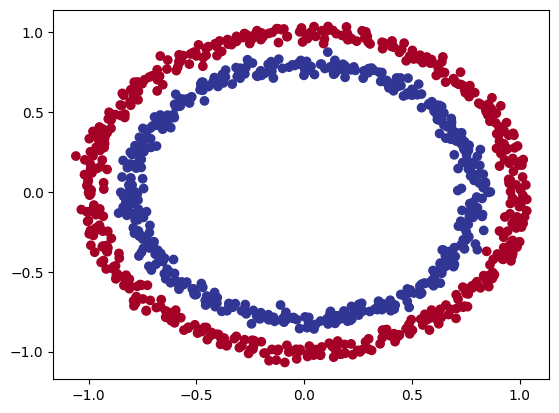

In [ ]:
import matplotlib.pyplot as plt
# x[:,0]: This represents the x-coordinates of the data points. It's assuming that x is a 2D array or a matrix, and [:,0] extracts all the values from the first column.
# x[:,1]: Similarly, this represents the y-coordinates of the data points. It extracts all the values from the second column of the matrix x.
plt.scatter(x=x[:,0],
            y=x[:,1],
            c=y,
            cmap=plt.cm.RdYlBu) # cmap=colormap

## 1. Check input and output shapes

In [ ]:
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
x_sample = x[0]
y_sample = y[0]

In [ ]:
x_sample, x_sample.shape

(array([0.75424625, 0.23148074]), (2,))

In [ ]:
y_sample, y_sample.shape  # as y is scalar,  it doesn't have shape

(1, ())

#### 1.2 Turn data into tensors and create train and test splits


In [ ]:
# Turn data into tensors

In [ ]:
import torch
torch.__version__

'2.1.0+cu121'

In [ ]:
x=torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
x.dtype, y.dtype

(torch.float32, torch.float32)

In [ ]:
# torch.manual_seed(42) = random_state(42)

In [ ]:
# Train_Test_split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.2, # 20 % of data will be test
                                                 random_state=42)

In [ ]:
len(X_train),len(X_test), len(y_train),len(y_test)

(800, 200, 800, 200)

## 2. Building a model

1. Setup device agnostic mode
2. Construct a model(by subclassing nn.module)
3. Define a loss function and optimizer
4. Creating training and testing loop

In [ ]:
import torch
from torch import nn

In [ ]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_train
# output's first line :
# [ 0.6579, -0.4651] --> x1 and x2 in X (Two input features)

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Creating a model:

1. Subclassing nn.Module
2. Create 2 nn.Linear() layers
3. Define a forward method
4. Instantiate an instance of our model class and send it to target class

In [ ]:
X_train.shape

torch.Size([800, 2])

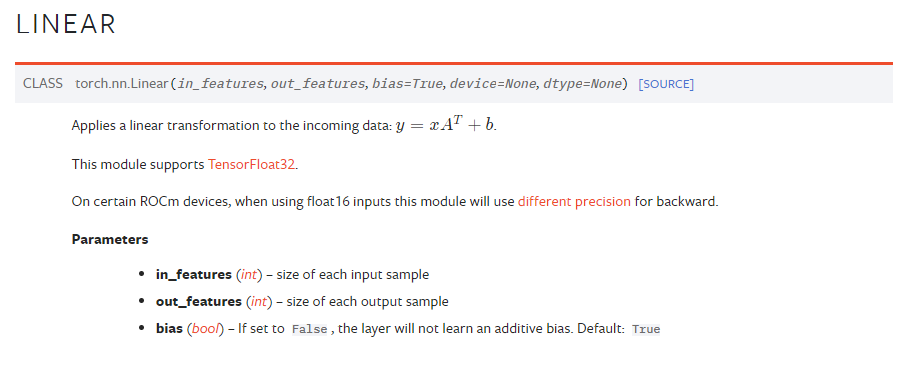

In [ ]:
from sklearn import datasets
# 1. Construct model subclassing nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. 2 nn.Linear layers
    self.layer1 = nn.Linear(in_features =2, out_features=5)  # five neurons in the hidden layer
    self.layer2 = nn.Linear(in_features=5, out_features=1)

  # 3. Forward method
  def forward(self, x):
    return self.layer2(self.layer1(x))  # x goes into layer 1, output of layer1 goes into layer2, layer2 goes into output

# 4. Instantiate
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

Our model is similar to this figure:

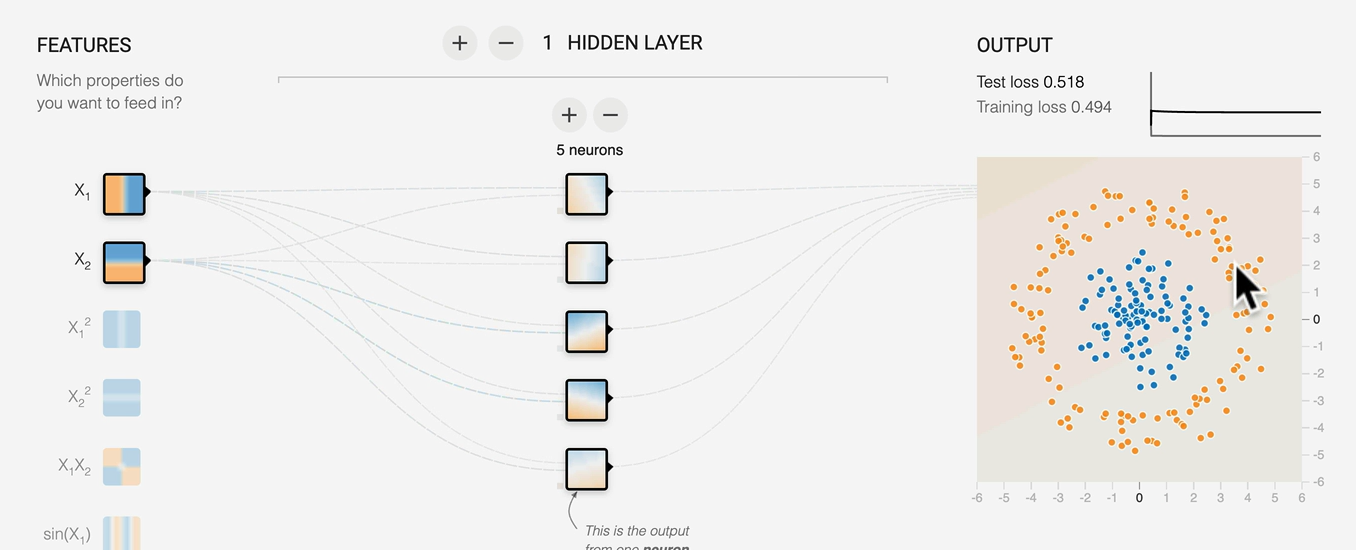

In [ ]:
# Replicate the above model using nn.Sequential

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0577,  0.0853],
                      [-0.0647, -0.3998],
                      [ 0.6498,  0.4556],
                      [ 0.3805, -0.5702],
                      [ 0.1815,  0.3159]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.2856,  0.5383,  0.5324, -0.1489,  0.5925], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.1113, -0.0602, -0.1981,  0.2438,  0.3691]], device='cuda:0')),
             ('1.bias', tensor([0.3856], device='cuda:0'))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Len of preds: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Len of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\n First 10 predictions(Outputs(Should be same as labels))  :\n {torch.round(untrained_preds[:11])}")
print(f"\n First 10 lables:\n {y_test[:11]}")

Len of preds: 200, Shape: torch.Size([200, 1])
Len of test samples: 200, Shape: torch.Size([200, 2])

 First 10 predictions(Outputs(Should be same as labels))  :
 tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

 First 10 lables:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.])


In [ ]:
X_test[:11], y_test[:11]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739],
         [-0.4702,  0.7875]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.]))

### 2.1 Setup Loss function and optimizezr

1. Which loss function or optimizer should you use?

* For regression you may want - MSE or MAE

* For Classification you may want - Binary cross entropy or categorical cross entropy

**Binary cross entropy/ logloss(refer medium document in google):**
Binary Cross Entropy is a loss function used in machine learning and deep learning to measure the difference between predicted binary outcomes and actual binary labels.

2. Two most used optimizers - SGD and ADAM

In [ ]:
# loss function
loss_fn = nn.BCEWithLogitsLoss() # has sigmoid activation function built-in
### Below code is same as above:
# nn.Sequential(
#     nn.Sigmoid(),
#     nn.BCELoss()
# )
# This loss combines a Sigmoid layer and the BCELoss in one single class.
# This version is more numerically stable than using a plain Sigmoid followed by a BCELoss as, by combining the operations into one layer, we take advantage of the log-sum-exp trick for numerical stability.


In [ ]:
# optimizer

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [ ]:
# Calculate accuracy - out of 100 samples, what percentage does our model get right?

# .item(): This converts the sum of correct predictions (which is a scalar tensor) into a Python numerical value. This is necessary because often you want to work with Python numbers rather than tensors.
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

## 3. Train Model

1. Forward pass
2. Calculate the loss
3. Optimize zero grad
4. Back propagation
5. Optimizer (Gradient descent)
6. Optimizer step

### 3.1 Raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be **raw logits**

We can convert **logits** into prediction probabilities by passing them into some activation function (e.g: sigmoid for BCE and softmax for Binary classification)

In [ ]:
# View first 5 outputs of forward pass on test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:6]

In [ ]:
y_logits

tensor([[0.3973],
        [0.3865],
        [0.4668],
        [0.3774],
        [0.5323],
        [0.5251]], device='cuda:0')

In [ ]:
y_test[:6] # outputs are not same as logits

tensor([1., 0., 1., 0., 1., 1.])

In [ ]:
# USe sigmoid activation on out model logits

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5980],
        [0.5954],
        [0.6146],
        [0.5932],
        [0.6300],
        [0.6284]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:

y_pred_probs >= 0.5, y=1 (class 1)

y_pred_probs < 0.5, y=0 (class 0)

In [ ]:
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:6]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()


tensor([True, True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1., 1.], device='cuda:0')

In [ ]:
y_test[:6]

tensor([1., 0., 1., 0., 1., 1.])

### 3.2 Training and Testing loop

In [ ]:
torch.manual_seed(42)

In [ ]:
epochs = 100

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test,y_test = X_test.to(device), y_test.to(device)

# Training and evaluation loop

for epoch in range(epochs):
  # Training
  model_0.train()

  # Forward pass
  y_logits = model_0(X_train).squeeze()  # removes extra one dimension
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # Calculate loss/ accuracy
  loss = loss_fn(y_logits,  # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred = y_pred)

  # optimize zero_grad
  optimizer.zero_grad()

  loss.backward

  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    # Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate test loss/ acc
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,
                    y_pred = test_pred)

  if epoch%10==0:
    print(f"Epoch:{epoch}, Loss: {loss:.5f},Acc: {acc:.2f}%, Test loss: {test_loss:.5f}, Test acc: {test_acc:2f}%")


Epoch:0, Loss: 0.72044,Acc: 50.00%, Test loss: 0.71800, Test acc: 50.000000%
Epoch:10, Loss: 0.72044,Acc: 50.00%, Test loss: 0.71800, Test acc: 50.000000%
Epoch:20, Loss: 0.72044,Acc: 50.00%, Test loss: 0.71800, Test acc: 50.000000%
Epoch:30, Loss: 0.72044,Acc: 50.00%, Test loss: 0.71800, Test acc: 50.000000%
Epoch:40, Loss: 0.72044,Acc: 50.00%, Test loss: 0.71800, Test acc: 50.000000%
Epoch:50, Loss: 0.72044,Acc: 50.00%, Test loss: 0.71800, Test acc: 50.000000%
Epoch:60, Loss: 0.72044,Acc: 50.00%, Test loss: 0.71800, Test acc: 50.000000%
Epoch:70, Loss: 0.72044,Acc: 50.00%, Test loss: 0.71800, Test acc: 50.000000%
Epoch:80, Loss: 0.72044,Acc: 50.00%, Test loss: 0.71800, Test acc: 50.000000%
Epoch:90, Loss: 0.72044,Acc: 50.00%, Test loss: 0.71800, Test acc: 50.000000%


## 4. Make predictions

Visualize, Visualize, Visualize....

We will use a helper function - **plot_decision_boundary()**

In [ ]:
import requests
from pathlib import Path

In [ ]:
# Download helper functions ifnot downloaded

if Path("helper_functions.py").is_file():
  print("Already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

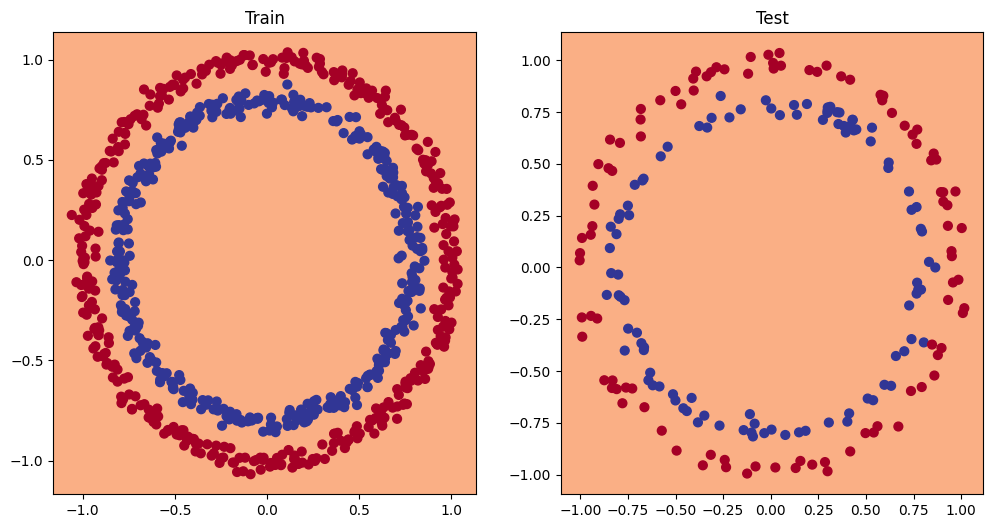

In [ ]:
# Plot decision boundary of model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

### What are we missing : Non Linearity

## 5. Add Non Linearity

In [ ]:
## Recreating non linear data

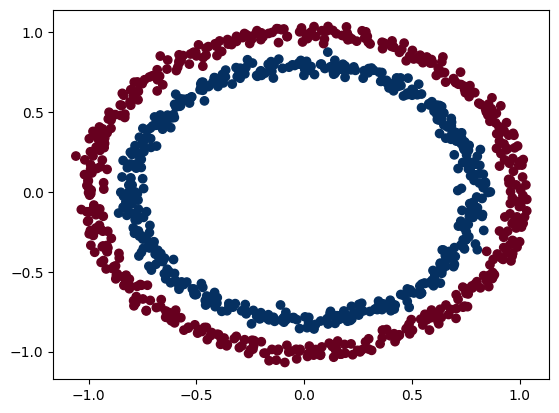

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [ ]:
# Convert data to tensors, then train, test and split
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size = 0.2,
                                                 random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 5.1 Building a model with non-linearity

In [ ]:
from torch import nn
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10) # 10 hidden units
    self.layer_2 = nn.Linear(in_features= 10,out_features = 10)
    self.layer_3 = nn.Linear(in_features= 10, out_features=1)
    self.relu = nn.ReLU()  # Non linear activation function

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_2 = CircleModelV1().to(device)
model_2

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
## Loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_2.parameters(),lr=0.1)


### 5.2 Training model with manual seed

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test= X_test.to(device),y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
  model_2.train()

  y_logits=model_2(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,
                    y_pred=test_pred)


  if epoch%100==0:
    print(f"Epoch {epoch} | Loss: {loss:.4f} | Test Loss: {test_loss:.4f} | Test ACc: {test_acc:.4f} ")

Epoch 0 | Loss: 0.6929 | Test Loss: 0.6932 | Test ACc: 50.0000 
Epoch 100 | Loss: 0.6912 | Test Loss: 0.6910 | Test ACc: 52.5000 
Epoch 200 | Loss: 0.6898 | Test Loss: 0.6894 | Test ACc: 55.0000 
Epoch 300 | Loss: 0.6879 | Test Loss: 0.6872 | Test ACc: 56.0000 
Epoch 400 | Loss: 0.6852 | Test Loss: 0.6841 | Test ACc: 56.5000 
Epoch 500 | Loss: 0.6810 | Test Loss: 0.6794 | Test ACc: 56.5000 
Epoch 600 | Loss: 0.6751 | Test Loss: 0.6729 | Test ACc: 56.0000 
Epoch 700 | Loss: 0.6666 | Test Loss: 0.6632 | Test ACc: 59.0000 
Epoch 800 | Loss: 0.6516 | Test Loss: 0.6476 | Test ACc: 67.5000 
Epoch 900 | Loss: 0.6236 | Test Loss: 0.6215 | Test ACc: 79.0000 


### 5.3 Make predictions

In [ ]:
model_2.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_2(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

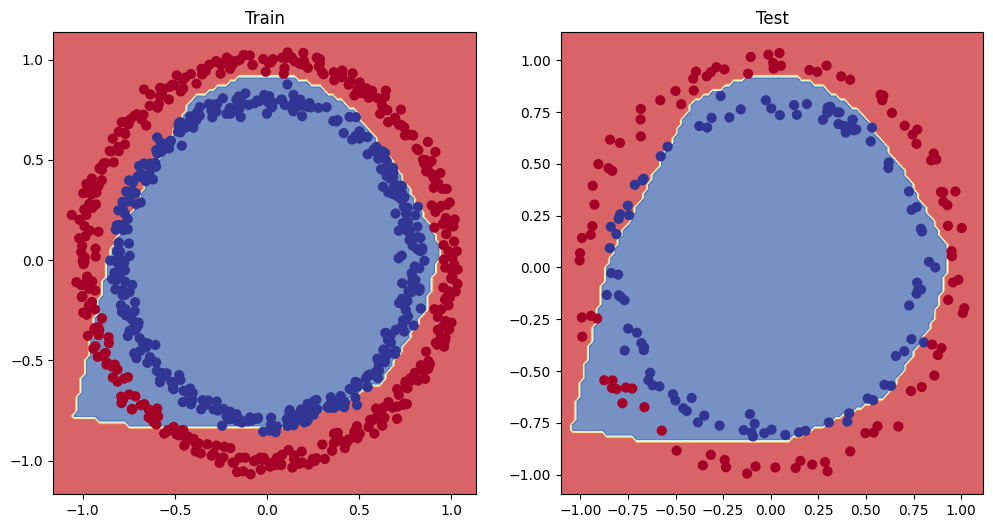

In [ ]:
# plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2,X_test,y_test)

### Replicating Non-linear functions

In [ ]:
# Create a tensor
A = torch.arange(-10,10,1, dtype= torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

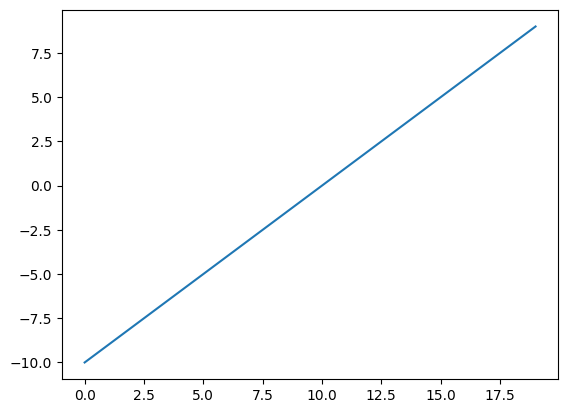

In [ ]:
# Visualize the tensor
plt.plot(A)

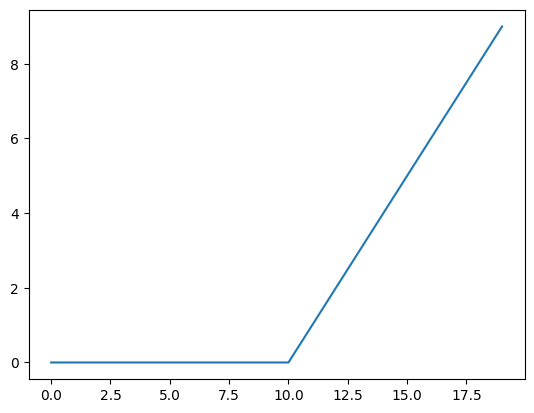

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

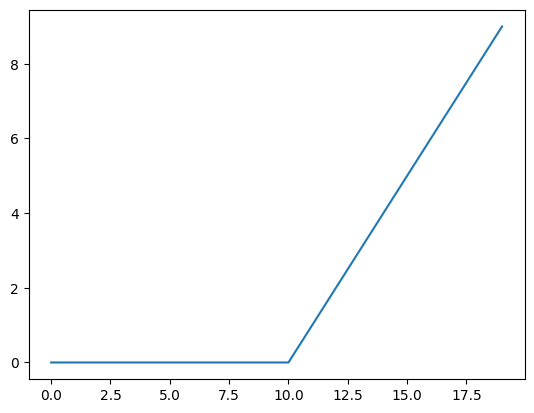

In [ ]:
plt.plot(relu(A))

In [ ]:
# let's use sigmoid

In [ ]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))

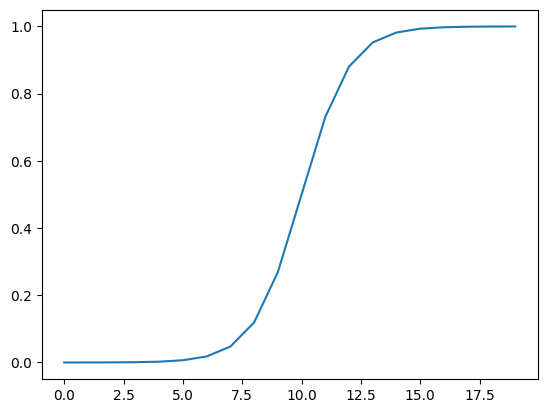

In [ ]:
plt.plot(torch.sigmoid(A))

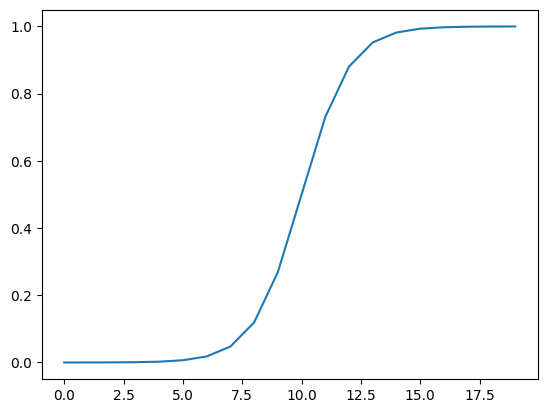

In [ ]:
plt.plot(sigmoid(A))

## 6. Putting it all together with a multiclass classification problem

### 6.1 Creating a toy multi-class dataset

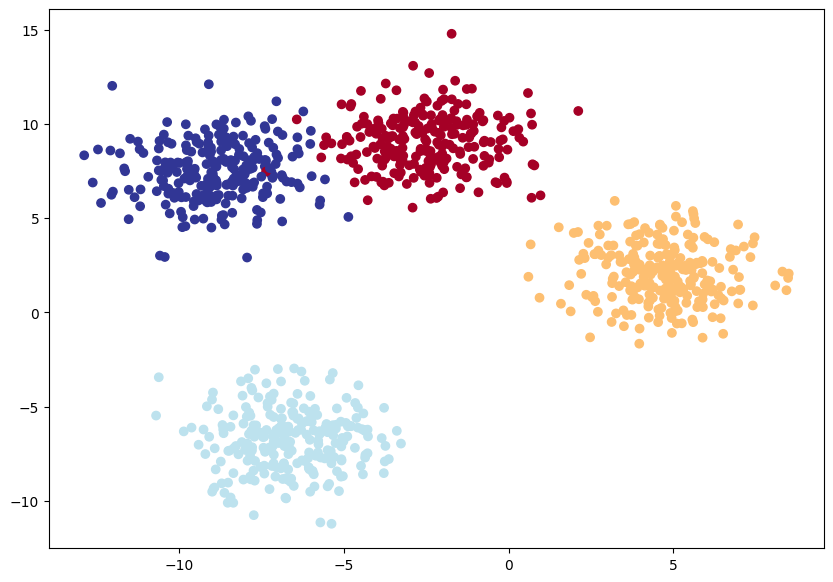

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


# Set hyperparameters
classes=4
features=2
random_seed=42

# 1. Create multiclass data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=features,
                            centers=classes,
                            cluster_std=1.5, # gives the cluster
                            random_state=random_seed)

# 2. Turn data into tensors
X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split data
X_blob_train, X_blob_test, y_blob_train,y_blob_test = train_test_split(X_blob,
                                                                       y_blob,
                                                                       test_size=0.2,
                                                                       random_state=random_seed)

# 4. Visualize
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

### 6.2 Creating a multi-class classification model

In [ ]:
# Create device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [ ]:
# Build a multiclass classification model
class BlobModel(nn.Module):
  """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
  """
  def __init__(self,input_features,output_features,hidden_units=8):
    super().__init__() # Initializes the model
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)



model_3 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_3




BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 6.3 Create a loss function and optimizer


In [ ]:
# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

### 6.4 Getting Prediction probablities

In [ ]:
model_3.eval()
with torch.inference_mode():
  y_logits = model_3(X_blob_test.to(device))

In [ ]:
y_logits[:10] # these are the logits

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
### We need to convert the y_preds format to y_blob_test format

In [ ]:
# Convert our model's logit outputs to prediction probs
y_pred_probs = torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


**Above output of pred probs describe that,
[0.3169, 0.3244, 0.1405, 0.2182]--> It predicts that:

1. 0.3169 (probability) is chance that is is/ belongs to class 1
2. 0.3244 is chance that it is class 2
and upto class 4**

In [ ]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [ ]:
torch.max(y_pred_probs[0]),torch.argmax(y_pred_probs[0]) # argmax gives index of max value (in above egL 0.3244)

(tensor(0.3244, device='cuda:0'), tensor(1, device='cuda:0'))

In [ ]:
# Likewise we want max values at every index
# Hence, convert our model's prediction probs to prediction labels

y_preds=torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [ ]:
classes

4

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

## 6.5 Creating a training loop and testing loop

In [ ]:
# Fit the multiclass model to data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs =100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ### Training
  model_3.train()

  y_logits=model_3(X_blob_train)
  y_pred=torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss=loss_fn(y_logits, y_blob_train)
  acc=accuracy_fn(y_true=y_blob_train,
                  y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_blob_test)
    test_preds= torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

  if epoch % 10 == 0:
          print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.15883, Acc: 40.38% | Test Loss: 1.07554, Test Acc: 21.00%
Epoch: 10 | Loss: 0.64476, Acc: 96.75% | Test Loss: 0.66069, Test Acc: 21.00%
Epoch: 20 | Loss: 0.42535, Acc: 98.50% | Test Loss: 0.43074, Test Acc: 21.00%
Epoch: 30 | Loss: 0.25294, Acc: 99.12% | Test Loss: 0.24508, Test Acc: 21.00%
Epoch: 40 | Loss: 0.11232, Acc: 99.25% | Test Loss: 0.10229, Test Acc: 21.00%
Epoch: 50 | Loss: 0.06627, Acc: 99.25% | Test Loss: 0.05848, Test Acc: 21.00%
Epoch: 60 | Loss: 0.05068, Acc: 99.25% | Test Loss: 0.04293, Test Acc: 21.00%
Epoch: 70 | Loss: 0.04300, Acc: 99.25% | Test Loss: 0.03491, Test Acc: 21.00%
Epoch: 80 | Loss: 0.03836, Acc: 99.25% | Test Loss: 0.02988, Test Acc: 21.00%
Epoch: 90 | Loss: 0.03525, Acc: 99.25% | Test Loss: 0.02663, Test Acc: 21.00%


### 6.6 Making and evaluating predictions

In [ ]:
model_3.eval()
with torch.inference_mode():
  y_logits=model_3(X_blob_test)

y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]], device='cuda:0')

Let's convert our model's prediction logits to prediction probabilities (using torch.softmax()) then to prediction labels (by taking the argmax() of each sample).

Note: It's possible to skip the torch.softmax() function and go straight from predicted logits -> predicted labels by calling torch.argmax() directly on the logits.

For example, y_preds = torch.argmax(y_logits, dim=1), this saves a computation step (no torch.softmax()) but results in no prediction probabilities being available to use.

In [ ]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


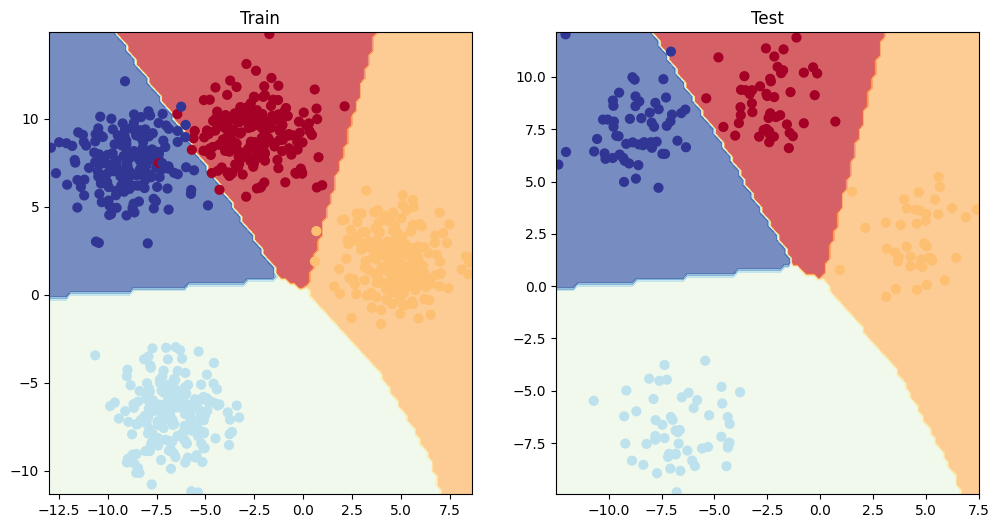

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_blob_test, y_blob_test)


## 7. More classification evaluation metrics

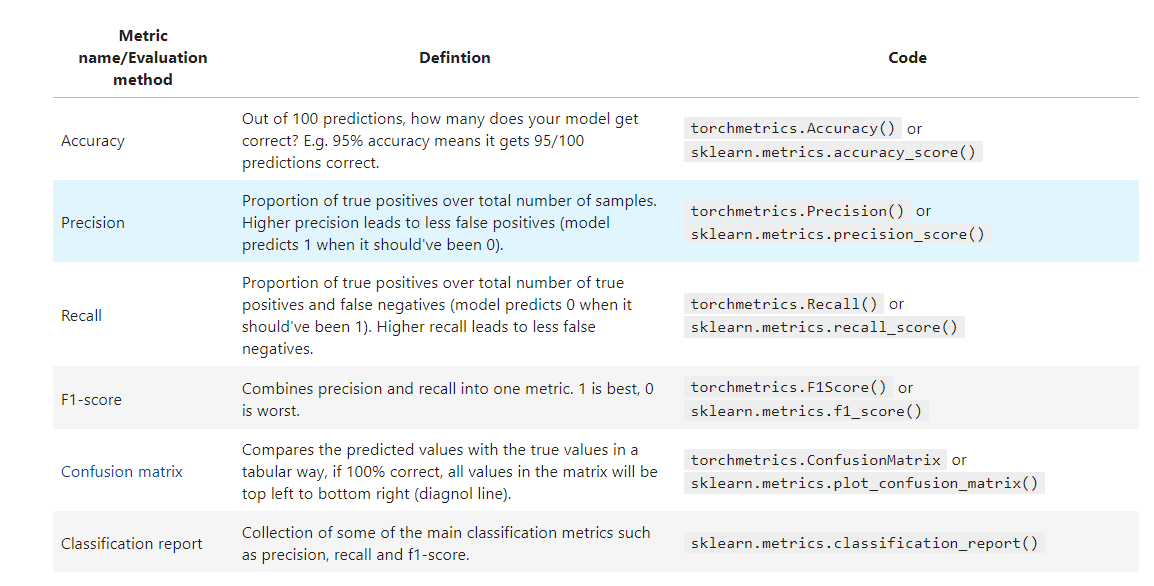